In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import re

In [2]:
archive=pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [5]:
with open (url.split('/')[-1],mode='wb') as file:
    file.write(response.content)

In [6]:
predict=pd.read_csv("image-predictions.tsv",sep='\t')

In [7]:
predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [9]:
df = []
tweet_id = archive['tweet_id']
wrong=[]

for id in tweet_id:
    try:
        page = api.get_status(id)
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        df.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
    except:
        print(id)

888202515573088257
873697596434513921
869988702071779329
866816280283807744
861769973181624320
842892208864923648
837012587749474308
827228250799742977
802247111496568832
775096608509886464
Rate limit reached. Sleeping for: 712
Rate limit reached. Sleeping for: 716


In [10]:
df = pd.DataFrame(df, columns = ['tweet_id', 'favorites', 'retweets'])
df.to_csv('tweet_json.txt', encoding = 'utf-8')

In [11]:
df = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
df.sample(5)

,Unnamed: 0,tweet_id,favorites,retweets
780,780,773922284943896577,7008,1954
1674,1674,681679526984871937,1890,494
1656,1656,682697186228989953,1412,396
811,811,770293558247038976,6826,1680
2055,2055,671151324042559489,701,164


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 4 columns):
Unnamed: 0    2346 non-null int64
tweet_id      2346 non-null int64
favorites     2346 non-null int64
retweets      2346 non-null int64
dtypes: int64(4)
memory usage: 73.4 KB


In [13]:
predict.set_index('tweet_id', inplace = True)
archive.set_index("tweet_id", inplace = True)
df.set_index('tweet_id', inplace = True)
df2 = pd.merge(left=archive, right=predict, left_index=True, right_index=True, how='left')
df2 = pd.merge(left=df2, right=df, left_index=True, right_index=True, how='left')
df2.to_csv('new_tweet.csv', encoding = 'utf-8')

## Assess

In [14]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

In [15]:
archive.sample(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
684195085588783105,NaN,NaN,2016-01-05 02:09:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tino. He really likes corndogs. 9/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684195085...,9,10,Tino,None,None,None,None
686618349602762752,NaN,NaN,2016-01-11 18:39:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She just saw an adult wearing ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686618349...,11,10,Olivia,None,None,pupper,None
779123168116150273,NaN,NaN,2016-09-23 01:00:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. He hugs everyone he meets. 12/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779123168...,12,10,Reggie,None,None,None,None
789314372632018944,NaN,NaN,2016-10-21 03:56:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOO...,NaN,NaN,NaN,https://twitter.com/sebscat/status/78881832853...,13,10,None,None,None,None,None
780858289093574656,NaN,NaN,2016-09-27 19:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dash. He's very stylish, but also incr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/780858289...,10,10,Dash,None,None,None,None


In [16]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [17]:
predict.sample(5)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
708834316713893888,https://pbs.twimg.com/media/CdZI_bpWEAAm1fs.jpg,1,Eskimo_dog,0.283945,True,giant_panda,0.218252,False,malamute,0.180401,True
670434127938719744,https://pbs.twimg.com/media/CU3cSG8W4AIAePH.jpg,1,jack-o'-lantern,0.919140,False,Chesapeake_Bay_retriever,0.027351,True,Labrador_retriever,0.020081,True
746726898085036033,https://pbs.twimg.com/media/ClzoJz7WYAELHSf.jpg,1,golden_retriever,0.256505,True,Labrador_retriever,0.252417,True,seat_belt,0.203163,False
786664955043049472,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,1,Leonberg,0.512034,True,keeshond,0.464816,True,Pomeranian,0.007812,True
673887867907739649,https://pbs.twimg.com/media/CVoha_IU4AAZ7vi.jpg,2,Brabancon_griffon,0.216767,True,Chihuahua,0.190958,True,golden_retriever,0.163288,True


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2346 entries, 892420643555336193 to 666020888022790149
Data columns (total 3 columns):
Unnamed: 0    2346 non-null int64
favorites     2346 non-null int64
retweets      2346 non-null int64
dtypes: int64(3)
memory usage: 73.3 KB


In [19]:
df.head()

,Unnamed: 0,favorites,retweets
tweet_id,,,
892420643555336193,0,39097,8695
892177421306343426,1,33487,6383
891815181378084864,2,25236,4241
891689557279858688,3,42468,8795
891327558926688256,4,40622,9576


In [20]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Toby           7
Bailey         7
Buddy          7
an             7
Stanley        6
Koda           6
Scout          6
Jax            6
Dave           6
Leo            6
Bella          6
Jack           6
Milo           6
Rusty          6
Oscar          6
Gus            5
            ... 
Tove           1
Glacier        1
Pip            1
Zoe            1
Cilantro       1
Jennifur       1
Olaf           1
Teddy          1
Socks          1
Snoop          1
Lenox          1
Jeremy         1
Zooey          1
Todo           1
Kanu           1
Ember          1
Steve          1
Laika          1
Eazy           1
Obi            1
Kane           1
Finnegus       1
Alexander      1
Meatball       1
Zara           1
Bronte         1
Edgar          1
Glenn         

In [21]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [22]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [77]:
data = pd.read_csv("new_tweet.csv")

In [78]:
data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,favorites,retweets
1031,745422732645535745,NaN,NaN,2016-06-22 01:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745422732...,...,True,golden_retriever,0.308261,True,ice_bear,0.004269,False,1021.0,9277.0,2724.0
472,816450570814898180,NaN,NaN,2017-01-04 01:05:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Moose. He doesn't want his friend to go b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816450570...,...,False,envelope,0.060107,False,nail,0.031291,False,464.0,33527.0,9200.0
1222,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714258258...,...,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True,1212.0,3234.0,796.0
794,773336787167145985,NaN,NaN,2016-09-07 01:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Fizz. She thinks love is a...,7.713808e+17,4.196984e+09,2016-09-01 16:14:48 +0000,https://twitter.com/dog_rates/status/771380798...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,784.0,0.0,5790.0
406,823719002937630720,NaN,NaN,2017-01-24 02:28:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Balto. He's very conten...,7.840579e+17,4.196984e+09,2016-10-06 15:49:14 +0000,"https://vine.co/v/5gKxeUpuKEr,https://vine.co/...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398.0,0.0,12723.0


#### Quality
* The timestamp column should be datetime instead of object.

* The tweet_id column should be string instead of int.

* The predict data for p1, p2, p3 the case are not consistent

* The name column has many cells which do not look like correct names. such as "a", "bo" and so on.

* The rating numerators are not all correct

* we only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets. 

* Some columns have missing values, such as in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

* In several columns, null values are not shown as null values.

* get the rating instead of numerator and dominator

* a lot of columns are irrelevant
#### Tidiness
* Reindex the all three tables using the tweet_id

* Parse the datetime information into seperate columns date and time

* The dog stages should be values instead of columns.


## Clean

#### Define
###### delete extra columns in 'data' dataframe

#### Code

In [79]:
data.columns

Index([u'tweet_id', u'in_reply_to_status_id', u'in_reply_to_user_id',
       u'timestamp', u'source', u'text', u'retweeted_status_id',
       u'retweeted_status_user_id', u'retweeted_status_timestamp',
       u'expanded_urls', u'rating_numerator', u'rating_denominator', u'name',
       u'doggo', u'floofer', u'pupper', u'puppo', u'jpg_url', u'img_num',
       u'p1', u'p1_conf', u'p1_dog', u'p2', u'p2_conf', u'p2_dog', u'p3',
       u'p3_conf', u'p3_dog', u'Unnamed: 0', u'favorites', u'retweets'],
      dtype='object')

In [80]:
data.drop(['Unnamed: 0'],axis=1, inplace=True)

#### Test

In [81]:
data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39097.0,8695.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33487.0,6383.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25236.0,4241.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42468.0,8795.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,40622.0,9576.0


In [82]:
data.columns

Index([u'tweet_id', u'in_reply_to_status_id', u'in_reply_to_user_id',
       u'timestamp', u'source', u'text', u'retweeted_status_id',
       u'retweeted_status_user_id', u'retweeted_status_timestamp',
       u'expanded_urls', u'rating_numerator', u'rating_denominator', u'name',
       u'doggo', u'floofer', u'pupper', u'puppo', u'jpg_url', u'img_num',
       u'p1', u'p1_conf', u'p1_dog', u'p2', u'p2_conf', u'p2_dog', u'p3',
       u'p3_conf', u'p3_dog', u'favorites', u'retweets'],
      dtype='object')

#### Define
##### Covert columns datatype: Change timestamp from object to datetime, and change the tweet_id from int to string object.

#### Code

In [83]:
data['timestamp']=pd.to_datetime(data['timestamp'])
data['date'] = data['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
data['time'] = data['timestamp'].apply(lambda time: time.strftime('%H:%M'))
data['date']=pd.to_datetime(data['date'])

In [84]:
data['tweet_id']=data['tweet_id'].astype(str)

#### Test

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                

#### Define
##### Make all the text in predict data same case type
#### Code

In [86]:
data['p1'] = data['p1'].str.title()
data['p2'] = data['p2'].str.title()
data['p3'] = data['p3'].str.title()

#### Test

In [87]:
data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,date,time
1278,708853462201716736,NaN,NaN,2016-03-13 03:13:29,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Lucy. She doesn't understand fetch. 8/...,NaN,NaN,NaN,https://vine.co/v/iHl2UDEBZ95,...,NaN,NaN,NaN,NaN,NaN,NaN,1921.0,727.0,2016-03-13,03:13
2092,670782429121134593,NaN,NaN,2015-11-29 01:52:48,"<a href=""http://twitter.com/download/iphone"" r...",This dude slaps your girl's ass what do you do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670782429...,...,French_Bulldog,0.036575,True,Boston_Bull,0.001977,True,1658.0,845.0,2015-11-29,01:52
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,...,Toy_Terrier,0.038872,True,Beagle,0.003226,True,541.0,175.0,2015-11-28,02:20
217,850380195714523136,NaN,NaN,2017-04-07 16:10:12,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a personal triathlon coach. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850380195...,...,Maltese_Dog,0.166364,True,Shih-Tzu,0.142254,True,13807.0,2856.0,2017-04-07,16:10
1798,677228873407442944,NaN,NaN,2015-12-16 20:48:40,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chuq. He just wants to fit in. 11...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677228873...,...,Tennis_Ball,0.154646,False,Green_Lizard,0.044976,False,3779.0,1808.0,2015-12-16,20:48


#### Define
##### Remove Retweets 
##### Remove Tweets which does not include image 

#### Code

In [88]:
#delete the tweets without image
data=data[data['img_num'].notnull()]

In [89]:
#delete the retweets
data=data[data.retweeted_status_id.isnull()]

In [90]:
#delete all the retweets metrices
data.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1, inplace=True)

#### Test

In [91]:
data['img_num'].isnull().sum()

0

In [92]:
data.columns

Index([u'tweet_id', u'in_reply_to_status_id', u'in_reply_to_user_id',
       u'timestamp', u'source', u'text', u'expanded_urls', u'rating_numerator',
       u'rating_denominator', u'name', u'doggo', u'floofer', u'pupper',
       u'puppo', u'jpg_url', u'img_num', u'p1', u'p1_conf', u'p1_dog', u'p2',
       u'p2_conf', u'p2_dog', u'p3', u'p3_conf', u'p3_dog', u'favorites',
       u'retweets', u'date', u'time'],
      dtype='object')

#### Define
##### Change Dog stages from columns into cell values

#### Code

In [93]:
dogstage = []

stage = ['pupper', 'puppo', 'doggo', 'floof']

for typ in data['text']:
    typ = typ.lower()
    for word in stage:
        if word in str(typ):
            dogstage.append(word)
            break
    else:
        dogstage.append('None')

data['dogstage'] = dogstage

In [94]:
data.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [95]:
data['dogstage'].value_counts()

None      1625
pupper     237
doggo       69
floof       34
puppo       29
Name: dogstage, dtype: int64

In [96]:
data.columns

Index([u'tweet_id', u'in_reply_to_status_id', u'in_reply_to_user_id',
       u'timestamp', u'source', u'text', u'expanded_urls', u'rating_numerator',
       u'rating_denominator', u'name', u'jpg_url', u'img_num', u'p1',
       u'p1_conf', u'p1_dog', u'p2', u'p2_conf', u'p2_dog', u'p3', u'p3_conf',
       u'p3_dog', u'favorites', u'retweets', u'date', u'time', u'dogstage'],
      dtype='object')

In [97]:
data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,date,time,dogstage
647,793135492858580992,NaN,NaN,2016-10-31 17:00:11,"<a href=""http://twitter.com/download/iphone"" r...",Your favorite squad is looking extra h*ckin sp...,https://twitter.com/dog_rates/status/793135492...,13,10,None,...,0.052396,False,Teddy,0.046593,False,7121.0,2839.0,2016-10-31,17:00,None
1868,675166823650848770,NaN,NaN,2015-12-11 04:14:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Arnold. He broke his leg saving a hand...,https://twitter.com/dog_rates/status/675166823...,10,10,Arnold,...,0.132569,True,Teddy,0.127975,False,3835.0,1764.0,2015-12-11,04:14,None
1983,672964561327235073,NaN,NaN,2015-12-05 02:23:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Terry. He's a Toasty Western Sriracha....,https://twitter.com/dog_rates/status/672964561...,10,10,Terry,...,0.173364,True,French_Bulldog,0.045507,True,1488.0,691.0,2015-12-05,02:23,None
103,872486979161796608,NaN,NaN,2017-06-07 16:14:40,"<a href=""http://twitter.com/download/iphone"" r...",We. Only. Rate. Dogs. Do not send in other thi...,https://twitter.com/dog_rates/status/872486979...,12,10,None,...,0.037721,True,Chihuahua,0.011967,True,41095.0,9253.0,2017-06-07,16:14,None
125,868622495443632128,NaN,NaN,2017-05-28 00:18:35,"<a href=""http://twitter.com/download/iphone"" r...",Here's a h*ckin peaceful boy. Unbothered by th...,https://twitter.com/dog_rates/status/868622495...,13,10,None,...,0.060973,True,Saint_Bernard,0.033489,True,27921.0,6161.0,2017-05-28,00:18,None


#### Define
##### Extract the accurate name
#### Code

In [98]:
data['text_split'] = data['text'].str.split()

In [99]:
names = []

def extract_names(row):
    #i found some strings start with this is + name, some start with this is, but the real name is followed by named, 
    #so i need to start with named first.
    # Text string starts with'named %'           
    if 'named' in row['text'] and re.match(r'[A-Z].*', row['text_split'][(row['text_split'].index('named') + 1)]): 
            names.append(row['text_split'][(row['text_split'].index('named') + 1)])
    
    # Text string starts with'Here we have %'
    elif row['text'].startswith('Here we have ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
            
    # Text string starts with'This is %'
    elif row['text'].startswith('This is ') and re.match(r'[A-Z].*', row['text_split'][2]):
            names.append(row['text_split'][2].strip('.').strip(','))
    
    # Text string starts with'Say hello to %'
    elif row['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    # Text string starts with'Meet %'
    elif row['text'].startswith('Meet ') and re.match(r'[A-Z].*', row['text_split'][1]):
            names.append(row['text_split'][1].strip('.').strip(','))
            
    else:
        names.append('No Name')
        
        
data.apply(extract_names, axis=1)

data['names'] = names

In [100]:
data['names'].value_counts()

No Name      625
Charlie       11
Cooper        10
Lucy          10
Oliver        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Lola           7
Daisy          7
Toby           6
Stanley        6
Koda           6
Bella          6
Jax            6
Bo             6
Bailey         5
Rusty          5
Oscar          5
Scout          5
Leo            5
Buddy          5
Louis          5
Milo           5
Chester        5
Phil           4
Gus            4
Derek          4
Oakley         4
            ... 
Zeek           1
Jennifur       1
Richie         1
Huxley         1
Chuk.          1
Dawn           1
O'Malley       1
Kanu           1
Sandra         1
Meera          1
Cermet         1
Koko           1
Sprinkles      1
Oshie          1
Zeus.          1
Stephan        1
Clyde          1
Livvie         1
Brudge         1
Lili           1
Grizzie        1
Mollie         1
Snoop          1
Lenox          1
Jeremy         1
Philbert       1
Zooey          1
Jerome        

In [101]:
data.drop(['text_split'], axis=1, inplace=True)

In [102]:
data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,date,time,dogstage,names
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,Banana,0.076110,False,39097.0,8695.0,2017-08-01,16:23,None,Phineas
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Papillon,0.068957,True,33487.0,6383.0,2017-08-01,00:17,None,Tilly
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,Kelpie,0.031379,True,25236.0,4241.0,2017-07-31,00:18,None,Archie
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,True,Spatula,0.040836,False,42468.0,8795.0,2017-07-30,15:58,None,Darla
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,German_Short-Haired_Pointer,0.175219,True,40622.0,9576.0,2017-07-29,16:00,None,Franklin


In [103]:
#replace the null values with the real null expressions. 
data.loc[data['names'] == 'No Name', 'names'] = None
data.loc[data['dogstage'] == 'None', 'dogstage'] = None

#### Test

In [104]:
data.columns

Index([u'tweet_id', u'in_reply_to_status_id', u'in_reply_to_user_id',
       u'timestamp', u'source', u'text', u'expanded_urls', u'rating_numerator',
       u'rating_denominator', u'name', u'jpg_url', u'img_num', u'p1',
       u'p1_conf', u'p1_dog', u'p2', u'p2_conf', u'p2_dog', u'p3', u'p3_conf',
       u'p3_dog', u'favorites', u'retweets', u'date', u'time', u'dogstage',
       u'names'],
      dtype='object')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                       1994 non-null object
p3_conf     

#### Define
##### delete unrelated columns : in_reply_to_status_id&in_reply_to_user_id
#### Code

In [106]:
data.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

In [107]:
data.drop(['name'], axis=1, inplace=True)

#### Test

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
favorites             1994 non-null float64
retweets              1994 non-null float64
date                 

In [109]:
data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,p1,...,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,date,time,dogstage,names
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,...,False,Banana,0.076110,False,39097.0,8695.0,2017-08-01,16:23,None,Phineas
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,...,True,Papillon,0.068957,True,33487.0,6383.0,2017-08-01,00:17,None,Tilly
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,...,True,Kelpie,0.031379,True,25236.0,4241.0,2017-07-31,00:18,None,Archie
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_Towel,...,True,Spatula,0.040836,False,42468.0,8795.0,2017-07-30,15:58,None,Darla
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,...,True,German_Short-Haired_Pointer,0.175219,True,40622.0,9576.0,2017-07-29,16:00,None,Franklin


#### Define
##### extract the real rating numerator and denominator from the text
#### Code

In [110]:
ratefromtext = []
data['text'].apply(lambda x: ratefromtext.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0)))
ratefromtext[1:10]

[[('13', '', '13', '10')],
 [('12', '', '12', '10')],
 [('13', '', '13', '10')],
 [('12', '', '12', '10')],
 [('13', '', '13', '10')],
 [('13', '', '13', '10')],
 [('13', '', '13', '10')],
 [('13', '', '13', '10')],
 [('14', '', '14', '10')]]

In [111]:
rating = []
for item in ratefromtext:
    # for tweets with no rating
    if len(item) == 0:
        rating.append('NaN')
        
    # for tweets have rating 
    elif len(item) == 1:
        rating.append(float(item[0][0]) / (float(item[0][-1])))
    # if any error has occurred
    # for tweets with more than one rating
    elif len(item) > 1: 
        total = 0
        r = []
        for i in range(len(item)):
            r.append(item[i])
        for rate in r:
            total = total + float(rate[0])/float(rate[-1])
        a = total / len(item)
        rating.append(a)
    else:
        rating.append('None')

        
data['rating'] = rating # not need to also add denominator since they are all 10!
data['rating'].value_counts()

1.2               453
1.0               411
1.1               399
1.3               261
0.9               152
0.8                94
0.7                52
1.4                36
0.6                32
0.5                30
0.3                19
0.4                14
0.2                 9
0.1                 4
0.75                4
0.95                3
0.85                3
1.05                3
0.0                 2
0.55                1
1.35                1
1.126               1
0.975               1
1.127               1
0.45                1
42.0                1
1.15                1
NaN                 1
177.6               1
0.966666666667      1
0.85                1
0.65                1
Name: rating, dtype: int64

In [112]:
data.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [114]:
data.columns

Index([u'tweet_id', u'timestamp', u'source', u'text', u'expanded_urls',
       u'jpg_url', u'img_num', u'p1', u'p1_conf', u'p1_dog', u'p2', u'p2_conf',
       u'p2_dog', u'p3', u'p3_conf', u'p3_dog', u'favorites', u'retweets',
       u'date', u'time', u'dogstage', u'names', u'rating'],
      dtype='object')

In [115]:
data.head()

,tweet_id,timestamp,source,text,expanded_urls,jpg_url,img_num,p1,p1_conf,p1_dog,...,p3,p3_conf,p3_dog,favorites,retweets,date,time,dogstage,names,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,...,Banana,0.076110,False,39097.0,8695.0,2017-08-01,16:23,None,Phineas,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,...,Papillon,0.068957,True,33487.0,6383.0,2017-08-01,00:17,None,Tilly,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,...,Kelpie,0.031379,True,25236.0,4241.0,2017-07-31,00:18,None,Archie,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_Towel,0.170278,False,...,Spatula,0.040836,False,42468.0,8795.0,2017-07-30,15:58,None,Darla,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,...,German_Short-Haired_Pointer,0.175219,True,40622.0,9576.0,2017-07-29,16:00,None,Franklin,1.2


In [116]:
data.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

### Analysis and Visualization

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv('twitter_archive_master.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1994 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 23 columns):
Unnamed: 0       1994 non-null int64
tweet_id         1994 non-null int64
source           1994 non-null object
text             1994 non-null object
expanded_urls    1994 non-null object
jpg_url          1994 non-null object
img_num          1994 non-null float64
p1               1994 non-null object
p1_conf          1994 non-null float64
p1_dog           1994 non-null bool
p2               1994 non-null object
p2_conf          1994 non-null float64
p2_dog           1994 non-null bool
p3               1994 non-null object
p3_conf          1994 non-null float64
p3_dog           1994 non-null bool
favorites        1994 non-null float64
retweets         1994 non-null float64
date             1994 non-null object
time             1994 non-null object
dogstage         369 non-null object
names            1369 non-null object
rating           1993 no

### Relationship among Retweets, Favorites and Ratings

In [120]:
df[['favorites', 'rating', 'retweets']].corr(method='pearson')

,favorites,rating,retweets
favorites,1.000000,0.022577,0.916974
rating,0.022577,1.000000,0.023412
retweets,0.916974,0.023412,1.000000


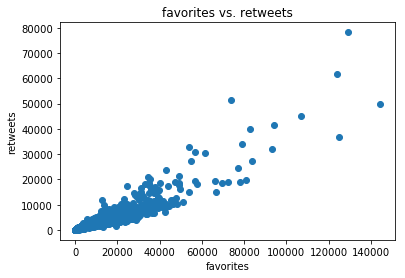

In [121]:
plt.scatter(df['favorites'],df['retweets'])
plt.title('favorites vs. retweets')
plt.xlabel('favorites')
plt.ylabel('retweets')

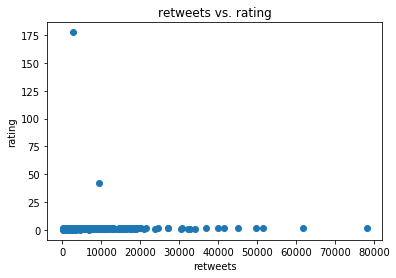

In [122]:
plt.scatter(df['retweets'],df['rating'])
plt.title('retweets vs. rating')
plt.xlabel('retweets')
plt.ylabel('rating')

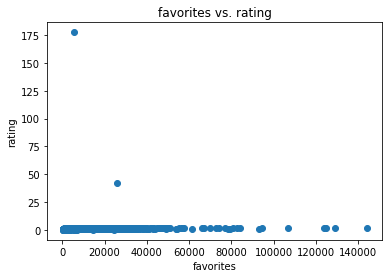

In [123]:
plt.scatter(df['favorites'],df['rating'])
plt.title('favorites vs. rating')
plt.xlabel('favorites')
plt.ylabel('rating')

In General, more favorites and retweets means the higher rating. There is a strong correlation between favorites and retweets. This means that if the tweet is good in general then there will be more retweets and favorites.
Yet there is almost no correlation between rating and retweets or rating and favorites. 

### Dog Stages Summary

(0.5, 2)

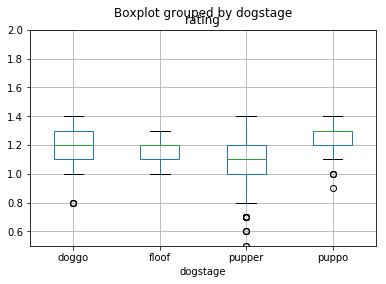

In [124]:
df.boxplot(column='rating', by='dogstage').set_ylim(0.5, 2)

In [125]:
df.groupby('dogstage')['rating'].describe()

dogstage       
doggo     count     69.000000
          mean       1.179710
          std        0.151055
          min        0.800000
          25%        1.100000
          50%        1.200000
          75%        1.300000
          max        1.400000
floof     count     34.000000
          mean       1.170588
          std        0.075996
          min        1.000000
          25%        1.100000
          50%        1.200000
          75%        1.200000
          max        1.300000
pupper    count    237.000000
          mean       1.061616
          std        0.183362
          min        0.300000
          25%        1.000000
          50%        1.100000
          75%        1.200000
          max        1.400000
puppo     count     29.000000
          mean       1.217241
          std        0.119729
          min        0.900000
          25%        1.200000
          50%        1.300000
          75%        1.300000
          max        1.400000
Name: rating, dtype: flo

So puppers are getting much lower rates than the other dog types. 

(0, 10000)

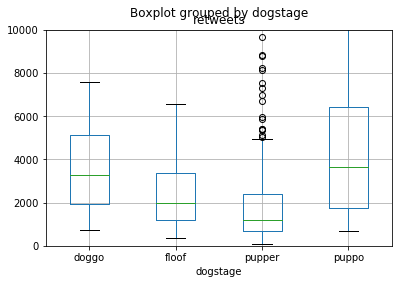

In [126]:
df.boxplot(column='retweets', by='dogstage').set_ylim(0, 10000)

we can see puppers are getting much lower retweets than the other dog types. Puppo gets most retweets compared to other three dog stages.